In [ ]:
import numpy as np
import cv2
import zipfile
from sklearn.model_selection import train_test_split

In [ ]:
local_zip = '/content/Q1 Dataset.zip'

In [ ]:
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
data_dir = '/tmp/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset'

In [ ]:
class_names = ['AD', 'MCI']

In [ ]:
def load_and_preprocess_image(image_path, img_size=(224, 224)):
  image = cv2.imread(image_path)

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  image = cv2.resize(image, img_size)

  image = image / 255.0

  image_array = np.array(image)

  return image_array

In [ ]:
# بارگذاری تصاویر و برچسب ها
all_images = []
all_labels = []

In [ ]:
import os
for class_name in class_names:
  class_dir = os.path.join(data_dir, class_name)
  for image_path in os.listdir(class_dir):
    image_array = load_and_preprocess_image(os.path.join(class_dir, image_path))
    all_images.append(image_array)
    if class_name == 'AD':
      all_labels.append(0)
    else:
      all_labels.append(1)

In [ ]:
all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import cv2
import random
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Define paths
parent_dir = '/tmp/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset'

# Initialize the ImageDataGenerator with validation split
datagen = ImageDataGenerator(
    rescale=1./255,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of data for validation
)

# Create training data generator
train_generator = datagen.flow_from_directory(
    directory=parent_dir,
    classes=['AD', 'MCI'],
    class_mode='binary',
    batch_size=32,
    target_size=(256, 256),
    subset='training'
)

# Create validation data generator
validation_generator = datagen.flow_from_directory(
    directory=parent_dir,
    classes=['AD', 'MCI'],
    class_mode='binary',
    batch_size=32,
    target_size=(256, 256),
    subset='validation'
)

# Create test data generator (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    directory=parent_dir,
    classes=['AD', 'MCI'],
    class_mode='binary',
    batch_size=32,
    target_size=(256, 256)
)


Found 1324 images belonging to 2 classes.
Found 330 images belonging to 2 classes.
Found 1654 images belonging to 2 classes.


In [ ]:
# Check the distribution of classes in each split
print("Training set - AD: {}, MCI: {}".format(np.sum(train_generator.labels == 0), np.sum(train_generator.labels == 1)))
print("Validation set - AD: {}, MCI: {}".format(np.sum(validation_generator.labels == 0), np.sum(validation_generator.labels == 1)))
print("Testing set - AD: {}, MCI: {}".format(np.sum(test_generator.labels == 0), np.sum(test_generator.labels == 1)))

Training set - AD: 772, MCI: 552
Validation set - AD: 193, MCI: 137
Testing set - AD: 965, MCI: 689


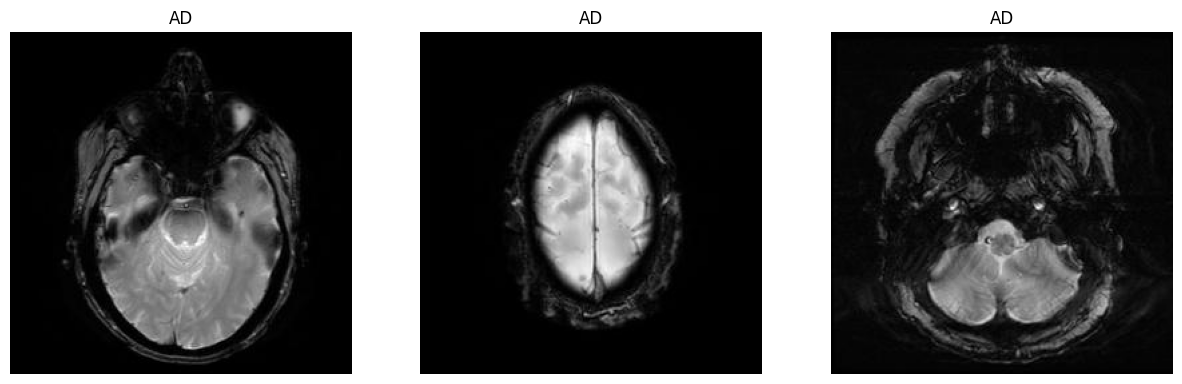

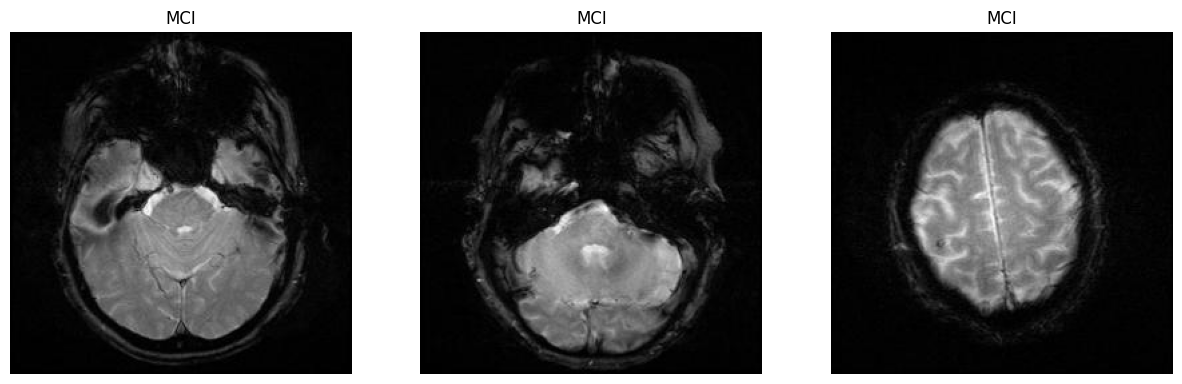

In [ ]:
# Collect image paths for AD and MCI datasets
ad_images = [os.path.join(parent_dir, 'AD', f) for f in os.listdir(os.path.join(parent_dir, 'AD')) if f.endswith('.jpg')]
mci_images = [os.path.join(parent_dir, 'MCI', f) for f in os.listdir(os.path.join(parent_dir, 'MCI')) if f.endswith('.jpg')]

# Display example images from AD and MCI datasets
num_examples = 3# Number of examples to display

# Function to display example images
def display_examples(image_paths, dataset_name):
    plt.figure(figsize=(15, 5))
    for i in range(num_examples):
        image = cv2.imread(image_paths[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.subplot(1, num_examples, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(dataset_name)
    plt.show()

# Display example images from AD dataset
display_examples(ad_images, 'AD')

# Display example images from MCI dataset
display_examples(mci_images, 'MCI')

In [ ]:
# Define paths
AD_path = '/tmp/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/AD'
MCI_path = '/tmp/Alzheimer_s_Disease_Neuroimaging_ADNI_Dataset/MCI'

# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory) if image.endswith('.jpg') or image.endswith('.png')]

# Get the list of image file paths for AD and MCI images
AD_images = get_image_paths(AD_path)
MCI_images = get_image_paths(MCI_path)

# Combine image paths with labels
AD_labels = np.zeros(len(AD_images), dtype=np.float32)
MCI_labels = np.ones(len(MCI_images), dtype=np.float32)

# Combine all images and labels
all_images = np.array(AD_images + MCI_images)
all_labels = np.concatenate([AD_labels, MCI_labels])

In [ ]:
# Function to get the list of image file paths in a directory
def get_image_paths(directory):
    return [os.path.join(directory, image) for image in os.listdir(directory)]

# Function to load and resize an image
def load_and_resize_image(image_path, target_size=(64, 64)):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert image to RGB
    image = cv2.resize(image, target_size)  # Resize image
    return image

# Function to apply augmentation to an image
def augment_image(image):
    # Example augmentations
    # Add your augmentation techniques here
    # Adaptive thresholding
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresholded = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)
    thresholded = cv2.cvtColor(thresholded, cv2.COLOR_GRAY2RGB) # Convert back to 3 channels
    thresholded = cv2.resize(thresholded, (64, 64)) # Resize to match other images

    # Cropping
    cropped = image[50:150, 50:150, :]  # Example: crop from (50,50) to (150,150)
    cropped = cv2.resize(cropped, (64, 64)) # Resize to match other images

    # Filtration (Median filter)
    filtered = cv2.medianBlur(image, 5)

    # DIP (Digital Image Processing) operation (histogram equalization)
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv[:,:,2] = cv2.equalizeHist(hsv[:,:,2])
    dip_processed = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

    # Combine all augmented images with labels
    augmentations = [
        (image, "Original"),
        (thresholded, "Adaptive Thresholding"),
        (cropped, "Cropped"),
        (filtered, "Median Filtered"),
        (dip_processed, "DIP Processed")
    ]
    return augmentations

# Load and resize original images
original_data = []
for image_path, label in zip(AD_images + MCI_images, AD_labels.tolist() + MCI_labels.tolist()):
    image = load_and_resize_image(image_path)
    original_data.append((image, label))

# Separate original images and labels
original_images = np.array([pair[0] for pair in original_data])
original_labels = np.array([pair[1] for pair in original_data])

augmented_data = []
augmented_labels = [] # A separate list to store labels for augmented images
for image, label in zip(original_images, original_labels):
    augmentations = augment_image(image)
    for augmented_image, _ in augmentations: # We discard the string labels here
        # Ensure all augmented images have the same shape
        augmented_image = cv2.resize(augmented_image, (64, 64))  # Resize to match original images
        augmented_data.append(augmented_image)
        augmented_labels.append(label) # Append the original label for each augmentation

# Separate augmented images and labels - modified to handle only images
augmented_images = np.array(augmented_data) # Now this should work
augmented_labels = np.array(augmented_labels) # Now this should work correctly
# Combine augmented and original datasets
X_combined = np.concatenate([original_images, augmented_images], axis=0)
y_combined = np.concatenate([original_labels, augmented_labels], axis=0)
# Split the combined dataset into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(6351, 64, 64, 3)
(1985, 64, 64, 3)
(1588, 64, 64, 3)


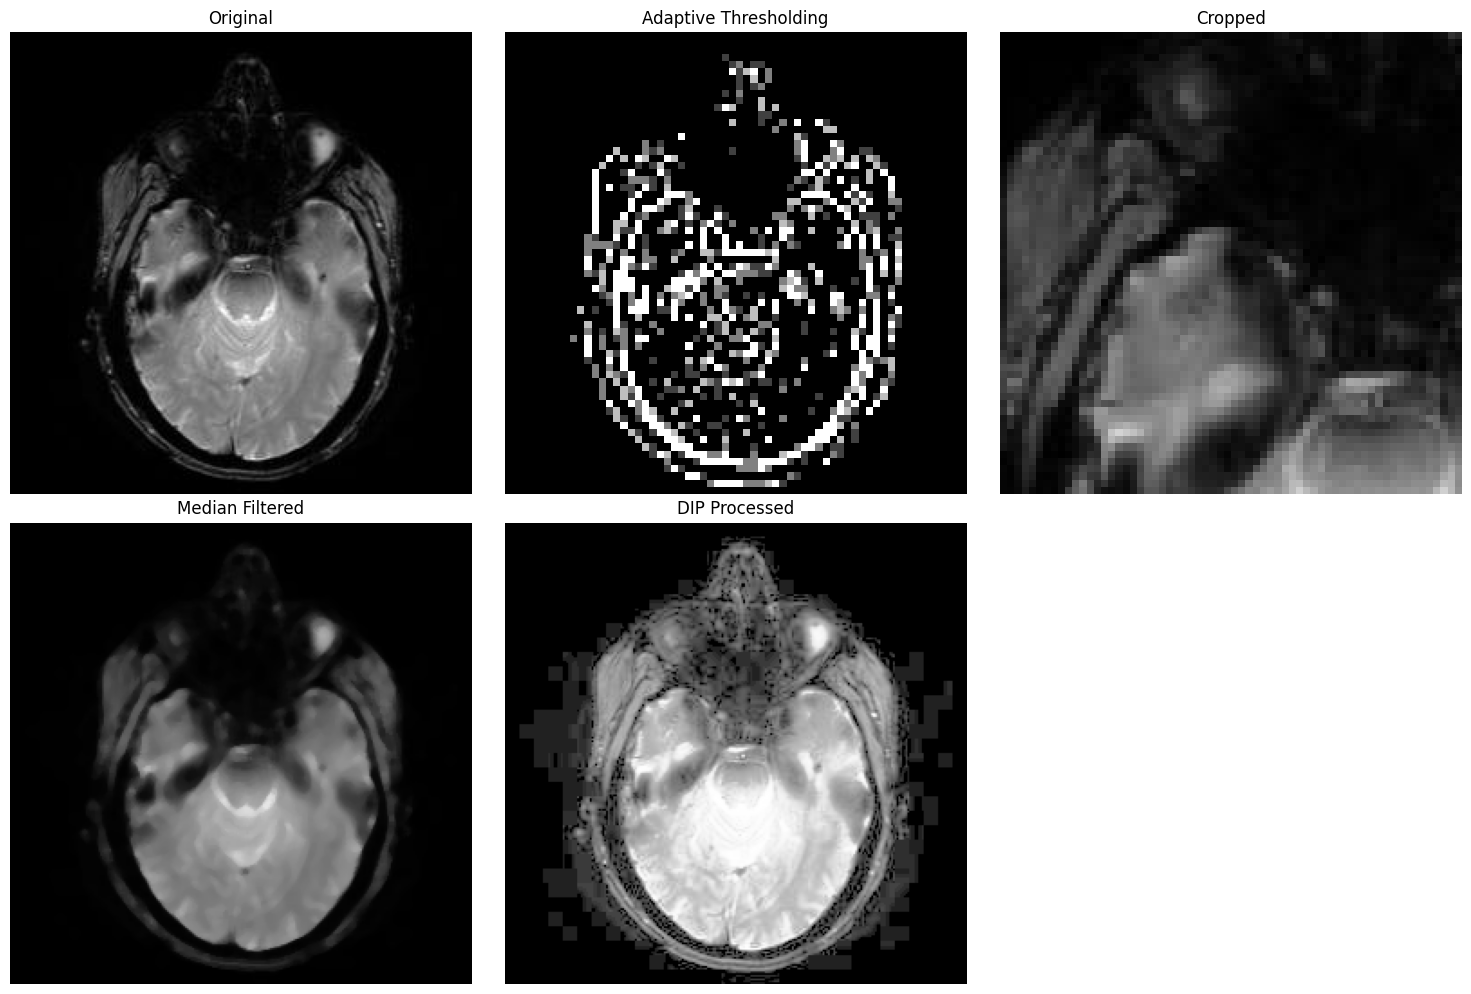

In [ ]:
# Choose an example image for demonstration
example_image_path = all_images[0]
# Load the image from the file path
example_image = cv2.imread(example_image_path)
# Convert the image to RGB
example_image = cv2.cvtColor(example_image, cv2.COLOR_BGR2RGB)
augmented_images = augment_image(example_image) # Pass the image array, not the file path

# Display original image and augmented versions
plt.figure(figsize=(15, 10))
for i, (image, label) in enumerate(augmented_images):
    plt.subplot(2, 3, i + 1)
    plt.imshow(image)
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print("Training set - AD: {}, MCI: {}".format(np.sum(y_train == 0), np.sum(y_train == 1)))
print("Validation set - AD: {}, MCI: {}".format(np.sum(y_val == 0), np.sum(y_val == 1)))
print("Testing set - AD: {}, MCI: {}".format(np.sum(y_test == 0), np.sum(y_test == 1)))

Training set - AD: 3678, MCI: 2673
Validation set - AD: 957, MCI: 631
Testing set - AD: 1155, MCI: 830


perposed model

In [ ]:
model_proposed = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_proposed.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model_proposed.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                   

In [ ]:
# Fit the model
history = model_proposed.fit(X_train, y_train,  # Use X_train and y_train
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val))  # Use X_val and y_val

Epoch 1/30
199/199 [==============================] - 10s 15ms/step - loss: 0.6735 - accuracy: 0.5870 - val_loss: 0.6280 - val_accuracy: 0.6486
Epoch 2/30
199/199 [==============================] - 2s 10ms/step - loss: 0.6121 - accuracy: 0.6563 - val_loss: 0.5929 - val_accuracy: 0.6732
Epoch 3/30
199/199 [==============================] - 2s 12ms/step - loss: 0.5475 - accuracy: 0.7056 - val_loss: 0.5394 - val_accuracy: 0.6870
Epoch 4/30
199/199 [==============================] - 2s 11ms/step - loss: 0.4555 - accuracy: 0.7667 - val_loss: 0.4311 - val_accuracy: 0.7689
Epoch 5/30
199/199 [==============================] - 2s 11ms/step - loss: 0.3477 - accuracy: 0.8255 - val_loss: 0.3562 - val_accuracy: 0.8438
Epoch 6/30
199/199 [==============================] - 2s 10ms/step - loss: 0.2548 - accuracy: 0.8740 - val_loss: 0.3191 - val_accuracy: 0.8640
Epoch 7/30
199/199 [==============================] - 2s 10ms/step - loss: 0.2113 - accuracy: 0.8914 - val_loss: 0.3374 - val_accuracy: 0.851

63/63 [==============================] - 1s 9ms/step - loss: 0.5960 - accuracy: 0.8947
Test Loss: 0.5960
Test Accuracy: 0.8947


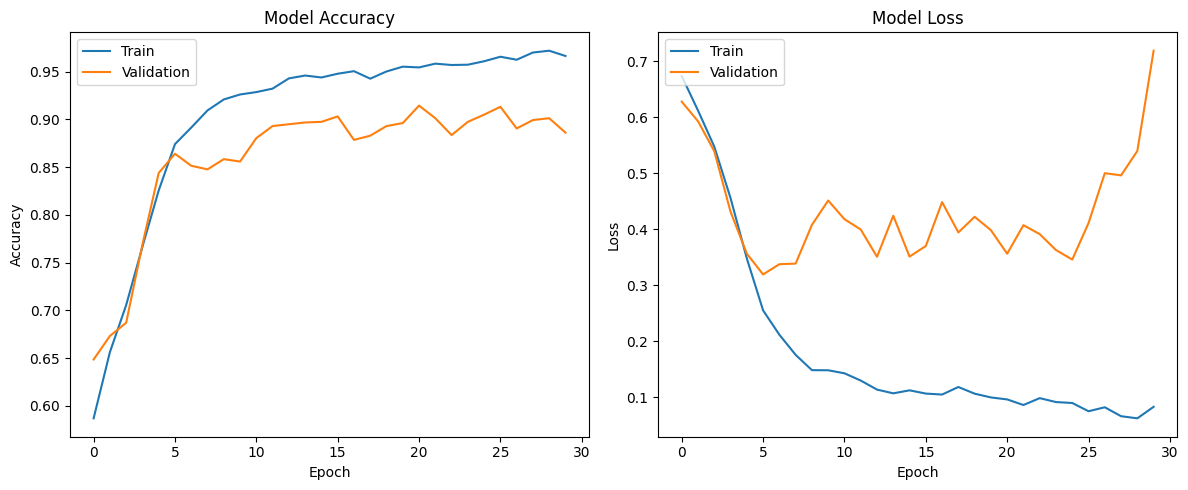

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model_proposed.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


63/63 [==============================] - 0s 5ms/step - loss: 0.5960 - accuracy: 0.8947
Test Loss: 0.5960
Test Accuracy: 89.47%
63/63 [==============================] - 0s 4ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74      1155
           1       0.00      0.00      0.00       830

    accuracy                           0.58      1985
   macro avg       0.29      0.50      0.37      1985
weighted avg       0.34      0.58      0.43      1985



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


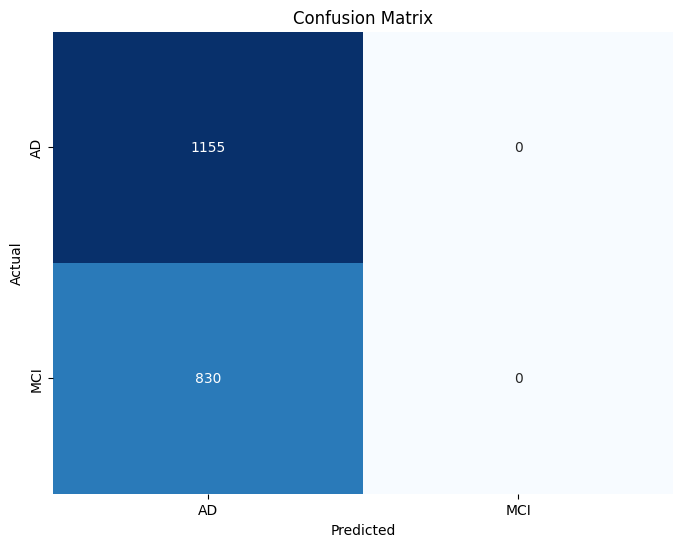

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate the model on test data
loss, accuracy = model_proposed.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

# Predict classes for test set
y_pred = model_proposed.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# True classes
y_true = y_test.astype(int)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes))

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['AD', 'MCI'], yticklabels=['AD', 'MCI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


testing1

In [ ]:

# Define Testing Model 1 architecture
model_testing1 = Sequential([
    # First convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),

    # First max-pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),

    # Second max-pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dense(2, activation='softmax')  # Softmax activation for multi-class classification (2 classes)
])


In [ ]:
# Compile the model
model_testing1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print model summary
model_testing1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [ ]:
history1 = model_testing1.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/30
199/199 [==============================] - 3s 9ms/step - loss: 0.6632 - accuracy: 0.6081 - val_loss: 0.5907 - val_accuracy: 0.6971
Epoch 2/30
199/199 [==============================] - 1s 7ms/step - loss: 0.5794 - accuracy: 0.6903 - val_loss: 0.5437 - val_accuracy: 0.7273
Epoch 3/30
199/199 [==============================] - 1s 5ms/step - loss: 0.4936 - accuracy: 0.7637 - val_loss: 0.4711 - val_accuracy: 0.7840
Epoch 4/30
199/199 [==============================] - 1s 5ms/step - loss: 0.4149 - accuracy: 0.7986 - val_loss: 0.4618 - val_accuracy: 0.7840
Epoch 5/30
199/199 [==============================] - 1s 5ms/step - loss: 0.3424 - accuracy: 0.8438 - val_loss: 0.4748 - val_accuracy: 0.8117
Epoch 6/30
199/199 [==============================] - 1s 5ms/step - loss: 0.3083 - accuracy: 0.8584 - val_loss: 0.4944 - val_accuracy: 0.8212
Epoch 7/30
199/199 [==============================] - 1s 5ms/step - loss: 0.2643 - accuracy: 0.8786 - val_loss: 0.4720 - val_accuracy: 0.8249
Epoch 

63/63 [==============================] - 0s 3ms/step - loss: 0.5925 - accuracy: 0.8730
Test Loss: 0.5925
Test Accuracy: 0.8730


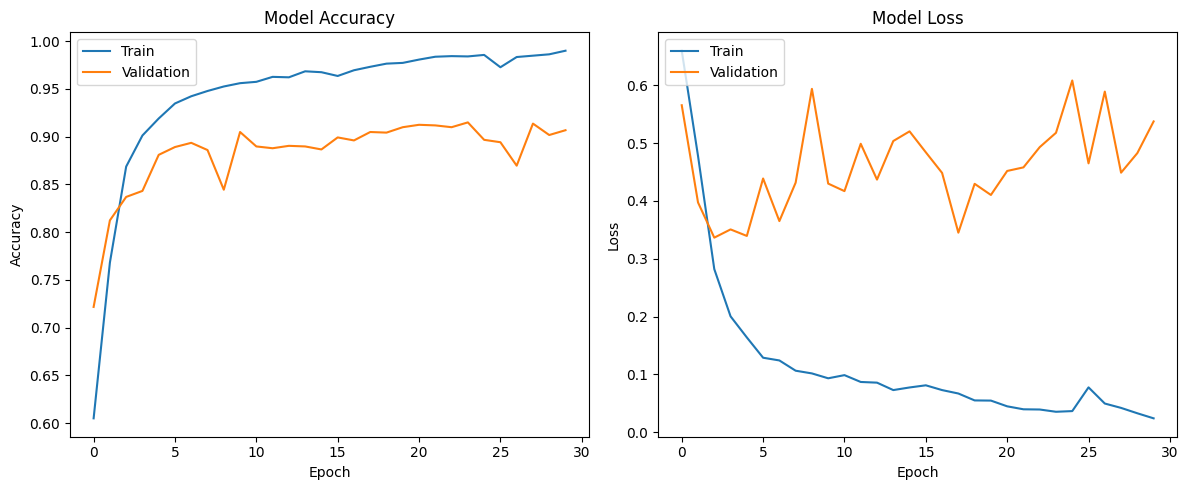

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model_testing1.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


63/63 [==============================] - 0s 5ms/step - loss: 0.5925 - accuracy: 0.8730
Testing Model 1 with Categorical Crossentropy:
Test Loss: 0.5925
Test Accuracy: 87.30%
63/63 [==============================] - 0s 2ms/step

Classification Report for Testing Model 1:
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89      1155
         1.0       0.87      0.82      0.84       830

    accuracy                           0.87      1985
   macro avg       0.87      0.87      0.87      1985
weighted avg       0.87      0.87      0.87      1985



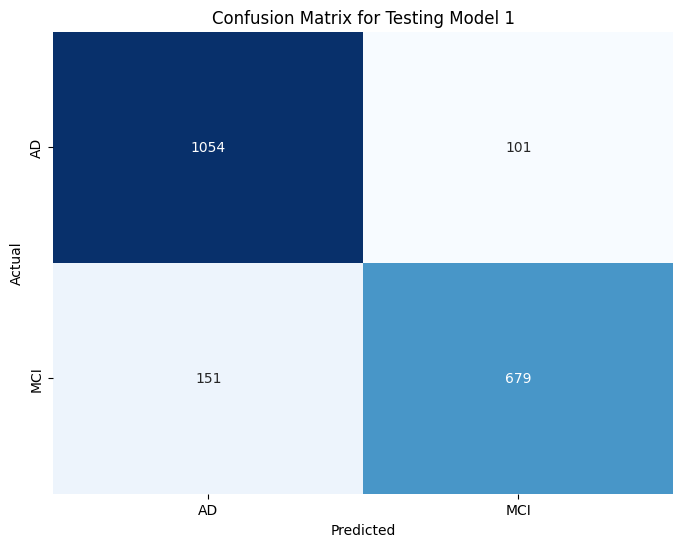

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Evaluate model_testing1 with categorical crossentropy
loss1, accuracy1 = model_testing1.evaluate(X_test, y_test)
print(f"Testing Model 1 with Categorical Crossentropy:")
print(f"Test Loss: {loss1:.4f}")
print(f"Test Accuracy: {accuracy1*100:.2f}%")

# Predict classes for model_testing1
y_pred1 = model_testing1.predict(X_test)
y_pred_classes1 = np.argmax(y_pred1, axis=1)

# Print classification report for model_testing1
print("\nClassification Report for Testing Model 1:")
print(classification_report(y_test, y_pred_classes1))

# Plot confusion matrix for model_testing1
cm1 = confusion_matrix(y_test, y_pred_classes1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['AD', 'MCI'], yticklabels=['AD', 'MCI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Testing Model 1')
plt.show()

testing2

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define Testing Model 2 architecture
model_testing2 = Sequential([
    # First convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),

    # Second convolutional layer
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),

    # First max-pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output
    Flatten(),

    # Fully connected layers
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

    # Output layer with 2 neurons for binary classification
    Dense(2, activation='softmax')  # Softmax activation for multi-class classification (2 classes)
])


In [ ]:
# Compile the model
model_testing2.compile(optimizer='adam'
, loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

In [ ]:
history2=model_testing2.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/30
199/199 [==============================] - 3s 10ms/step - loss: 0.6564 - accuracy: 0.6083 - val_loss: 0.5802 - val_accuracy: 0.7286
Epoch 2/30
199/199 [==============================] - 2s 8ms/step - loss: 0.5199 - accuracy: 0.7339 - val_loss: 0.5965 - val_accuracy: 0.7103
Epoch 3/30
199/199 [==============================] - 2s 8ms/step - loss: 0.3618 - accuracy: 0.8284 - val_loss: 0.3602 - val_accuracy: 0.8356
Epoch 4/30
199/199 [==============================] - 2s 10ms/step - loss: 0.2379 - accuracy: 0.8821 - val_loss: 0.3661 - val_accuracy: 0.8552
Epoch 5/30
199/199 [==============================] - 2s 9ms/step - loss: 0.1836 - accuracy: 0.9114 - val_loss: 0.3457 - val_accuracy: 0.8463
Epoch 6/30
199/199 [==============================] - 2s 8ms/step - loss: 0.1424 - accuracy: 0.9276 - val_loss: 0.4461 - val_accuracy: 0.8690
Epoch 7/30
199/199 [==============================] - 2s 9ms/step - loss: 0.1192 - accuracy: 0.9376 - val_loss: 0.4628 - val_accuracy: 0.8482
Epoc

63/63 [==============================] - 0s 4ms/step - loss: 0.4961 - accuracy: 0.9093
Test Loss: 0.4961
Test Accuracy: 0.9093


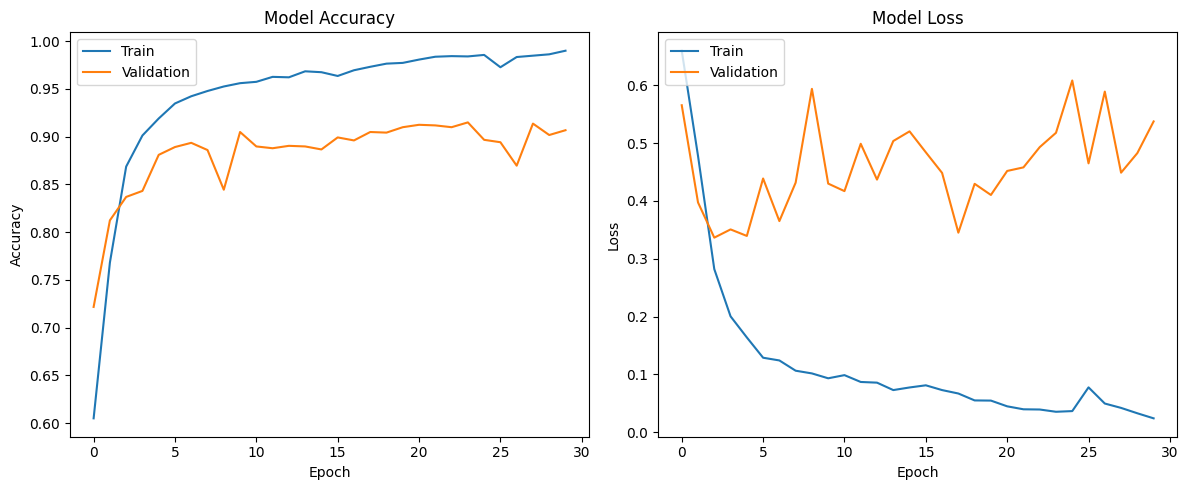

In [ ]:
# Evaluate the model on the test set
loss, accuracy = model_testing2.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


63/63 [==============================] - 0s 6ms/step - loss: 0.4961 - accuracy: 0.9093

Testing Model 2 with Categorical Crossentropy:
Test Loss: 0.4961
Test Accuracy: 90.93%
63/63 [==============================] - 0s 3ms/step

Classification Report for Testing Model 2:
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92      1155
         1.0       0.88      0.91      0.89       830

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985



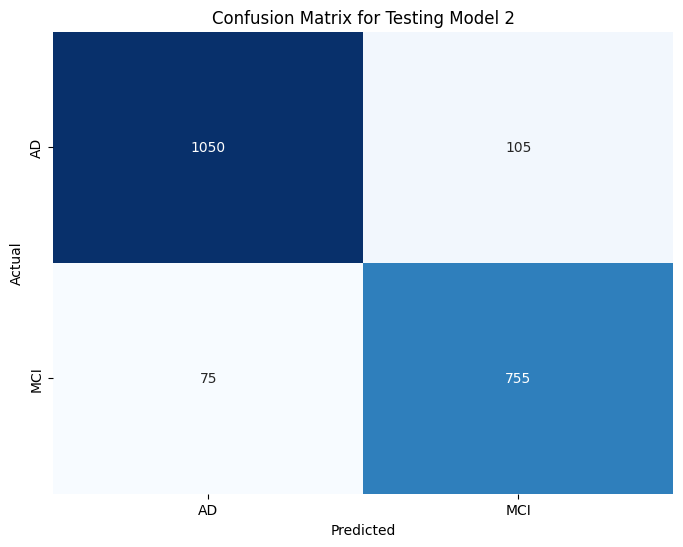

In [ ]:
# Evaluate model_testing2 with categorical crossentropy
loss2, accuracy2 = model_testing2.evaluate(X_test, y_test)
print(f"\nTesting Model 2 with Categorical Crossentropy:")
print(f"Test Loss: {loss2:.4f}")
print(f"Test Accuracy: {accuracy2*100:.2f}%")

# Predict classes for model_testing2
y_pred2 = model_testing2.predict(X_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)

# Print classification report for model_testing2
print("\nClassification Report for Testing Model 2:")
print(classification_report(y_test, y_pred_classes2))

# Plot confusion matrix for model_testing2
cm2 = confusion_matrix(y_test, y_pred_classes2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['AD', 'MCI'], yticklabels=['AD', 'MCI'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Testing Model 2')
plt.show()


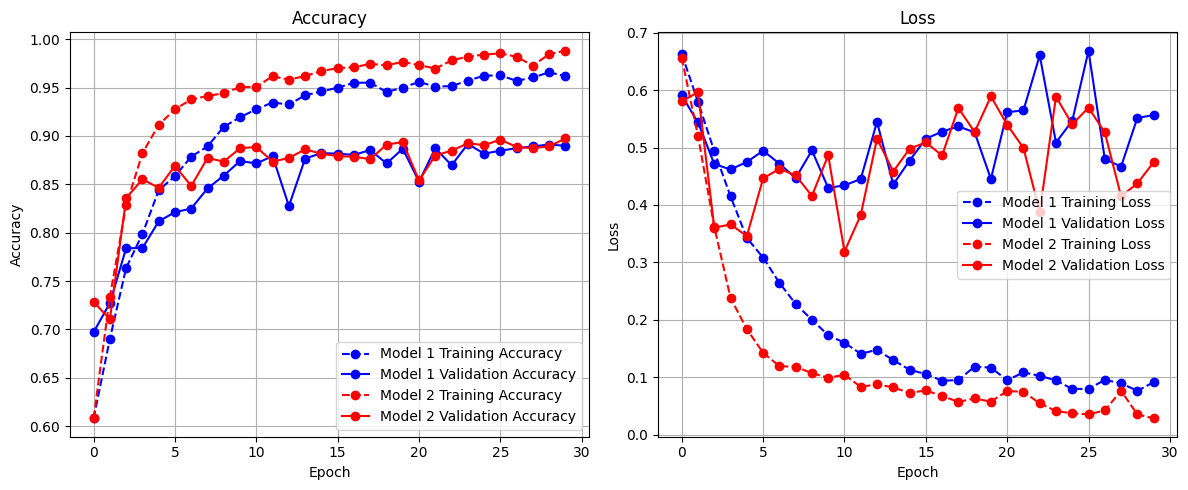

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Model 1 Training Accuracy', linestyle='--', marker='o', color='b')
plt.plot(history1.history['val_accuracy'], label='Model 1 Validation Accuracy', linestyle='-', marker='o', color='b')
plt.plot(history2.history['accuracy'], label='Model 2 Training Accuracy', linestyle='--', marker='o', color='r')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation Accuracy', linestyle='-', marker='o', color='r')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Model 1 Training Loss', linestyle='--', marker='o', color='b')
plt.plot(history1.history['val_loss'], label='Model 1 Validation Loss', linestyle='-', marker='o', color='b')
plt.plot(history2.history['loss'], label='Model 2 Training Loss', linestyle='--', marker='o', color='r')
plt.plot(history2.history['val_loss'], label='Model 2 Validation Loss', linestyle='-', marker='o', color='r')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
!pip install scikit-learn
import matplotlib.pyplot as plta
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

def calculate_metrics(model, X, y_true):
    # Predict classes
    y_pred = model.predict(X)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred_classes)
    precision = precision_score(y_true, y_pred_classes)
    recall = recall_score(y_true, y_pred_classes)
    f1 = f1_score(y_true, y_pred_classes)

    # Calculate AUC - Handle cases without predict_proba
    try:
        y_pred_prob = model.predict_proba(X)
        roc_auc = roc_auc_score(y_true, y_pred_prob[:, 1])
    except AttributeError:
        # If predict_proba is not available, use predictions directly
        # One-hot encode y_true for compatibility with roc_auc_score
        enc = OneHotEncoder(handle_unknown='ignore')
        y_true_onehot = enc.fit_transform(y_true.reshape(-1, 1)).toarray()
        roc_auc = roc_auc_score(y_true_onehot, y_pred)

    return accuracy, precision, recall, f1, roc_auc, y_pred_classes


perposed with droupput

In [ ]:
from tensorflow.keras.layers import Dropout

# Define the model architecture
model_proposed_dropout = Sequential([
    # First convolutional layer with Dropout
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    Dropout(0.25),

    # Second convolutional layer with Dropout
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    Dropout(0.25),

    # First max-pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer with Dropout
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Dropout(0.25),

    # Fourth convolutional layer with Dropout
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    Dropout(0.25),

    # Second max-pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the convolutional layers
    Flatten(),

    # Fully connected layers with Dropout
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),

    # Output layer for binary classification (AD or MCI)
    Dense(2, activation='softmax')  # Softmax activation for multi-class classification
])





In [ ]:
# Compile the model
model_proposed_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print model summary
model_proposed_dropout.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_12 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 dropout_13 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 64)        18496     
                                                      

In [ ]:
history3=model_proposed_dropout.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/30
199/199 [==============================] - 7s 18ms/step - loss: 0.6874 - accuracy: 0.5722 - val_loss: 0.6707 - val_accuracy: 0.6026
Epoch 2/30
199/199 [==============================] - 3s 14ms/step - loss: 0.6594 - accuracy: 0.5941 - val_loss: 0.6648 - val_accuracy: 0.6858
Epoch 3/30
199/199 [==============================] - 3s 14ms/step - loss: 0.6398 - accuracy: 0.6327 - val_loss: 0.6125 - val_accuracy: 0.6940
Epoch 4/30
199/199 [==============================] - 3s 15ms/step - loss: 0.6126 - accuracy: 0.6604 - val_loss: 0.5896 - val_accuracy: 0.7097
Epoch 5/30
199/199 [==============================] - 3s 15ms/step - loss: 0.5966 - accuracy: 0.6725 - val_loss: 0.5819 - val_accuracy: 0.7097
Epoch 6/30
199/199 [==============================] - 3s 15ms/step - loss: 0.5600 - accuracy: 0.6980 - val_loss: 0.5440 - val_accuracy: 0.7298
Epoch 7/30
199/199 [==============================] - 3s 15ms/step - loss: 0.5288 - accuracy: 0.7161 - val_loss: 0.5027 - val_accuracy: 0.7613

model1droupput

In [ ]:
# Define the model architecture
model_testing1_dropout = Sequential([
    # First convolutional layer with Dropout
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    Dropout(0.25),

    # Second convolutional layer with Dropout
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    Dropout(0.25),

    # First max-pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the convolutional layers
    Flatten(),

    # Fully connected layers with Dropout
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # Softmax activation for multi-class classification
])



In [ ]:
# Compile the model
model_testing1_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print model summary
model_testing1_dropout.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_25 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 conv2d_29 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 dropout_26 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_10 (Flatten)        (None, 28800)             0         
                                                     

In [ ]:
history4=model_proposed_dropout.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/30
199/199 [==============================] - 3s 16ms/step - loss: 0.1666 - accuracy: 0.9084 - val_loss: 0.2543 - val_accuracy: 0.8709
Epoch 2/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1612 - accuracy: 0.9137 - val_loss: 0.2690 - val_accuracy: 0.8766
Epoch 3/30
199/199 [==============================] - 3s 14ms/step - loss: 0.1687 - accuracy: 0.9159 - val_loss: 0.2332 - val_accuracy: 0.8829
Epoch 4/30
199/199 [==============================] - 3s 16ms/step - loss: 0.1603 - accuracy: 0.9165 - val_loss: 0.2577 - val_accuracy: 0.8778
Epoch 5/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1644 - accuracy: 0.9112 - val_loss: 0.2469 - val_accuracy: 0.8854
Epoch 6/30
199/199 [==============================] - 3s 14ms/step - loss: 0.1575 - accuracy: 0.9107 - val_loss: 0.2280 - val_accuracy: 0.8911
Epoch 7/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1610 - accuracy: 0.9117 - val_loss: 0.2325 - val_accuracy: 0.8955

model2 droup put

In [ ]:
# Define the model architecture
model_testing2_dropout = Sequential([
    # First convolutional layer with Dropout
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    Dropout(0.25),

    # Second convolutional layer with Dropout
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    Dropout(0.25),

    # Max-pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the convolutional layers
    Flatten(),

    # Fully connected layers with Dropout
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),

    # Output layer for binary classification (AD or MCI)
    Dense(2, activation='softmax')  # Softmax activation for multi-class classification
])


In [ ]:
# Compile the model
model_testing2_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Print model summary
model_testing2_dropout.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 dropout_36 (Dropout)        (None, 62, 62, 32)        0         
                                                                 
 conv2d_35 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 dropout_37 (Dropout)        (None, 60, 60, 32)        0         
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 28800)             0         
                                                     

In [ ]:
history5=model_proposed_dropout.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/30
199/199 [==============================] - 3s 16ms/step - loss: 0.1360 - accuracy: 0.9293 - val_loss: 0.2485 - val_accuracy: 0.8879
Epoch 2/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1378 - accuracy: 0.9299 - val_loss: 0.2279 - val_accuracy: 0.8992
Epoch 3/30
199/199 [==============================] - 3s 16ms/step - loss: 0.1392 - accuracy: 0.9279 - val_loss: 0.2366 - val_accuracy: 0.8961
Epoch 4/30
199/199 [==============================] - 3s 14ms/step - loss: 0.1343 - accuracy: 0.9287 - val_loss: 0.2056 - val_accuracy: 0.9030
Epoch 5/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1338 - accuracy: 0.9284 - val_loss: 0.2467 - val_accuracy: 0.8911
Epoch 6/30
199/199 [==============================] - 3s 14ms/step - loss: 0.1486 - accuracy: 0.9214 - val_loss: 0.2229 - val_accuracy: 0.8999
Epoch 7/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1333 - accuracy: 0.9298 - val_loss: 0.2232 - val_accuracy: 0.8961

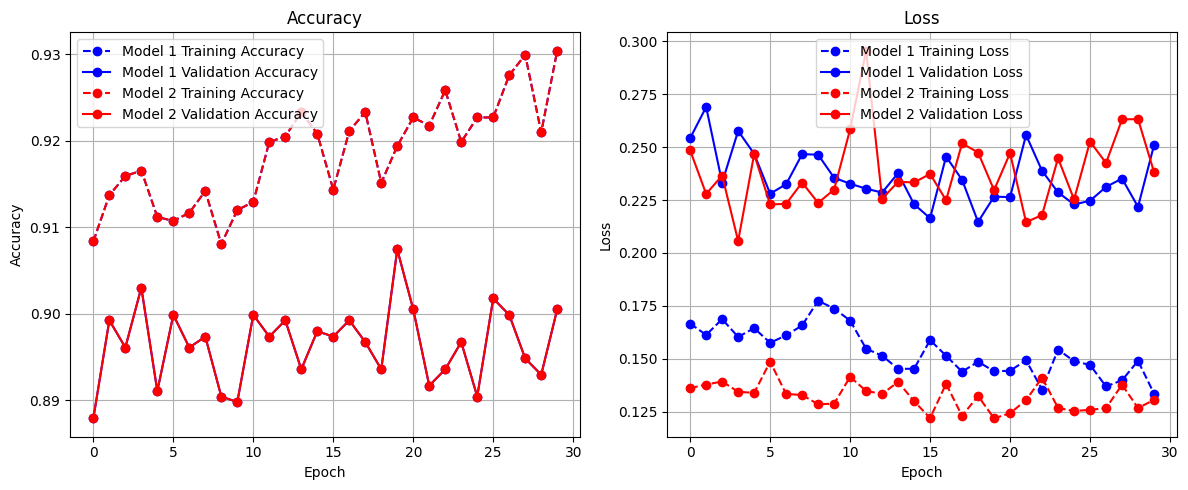

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history4.history['accuracy'], label='Model 1 Training Accuracy', linestyle='--', marker='o', color='b')
plt.plot(history5.history['val_accuracy'], label='Model 1 Validation Accuracy', linestyle='-', marker='o', color='b')
plt.plot(history4.history['accuracy'], label='Model 2 Training Accuracy', linestyle='--', marker='o', color='r')
plt.plot(history5.history['val_accuracy'], label='Model 2 Validation Accuracy', linestyle='-', marker='o', color='r')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history4.history['loss'], label='Model 1 Training Loss', linestyle='--', marker='o', color='b')
plt.plot(history4.history['val_loss'], label='Model 1 Validation Loss', linestyle='-', marker='o', color='b')
plt.plot(history5.history['loss'], label='Model 2 Training Loss', linestyle='--', marker='o', color='r')
plt.plot(history5.history['val_loss'], label='Model 2 Validation Loss', linestyle='-', marker='o', color='r')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


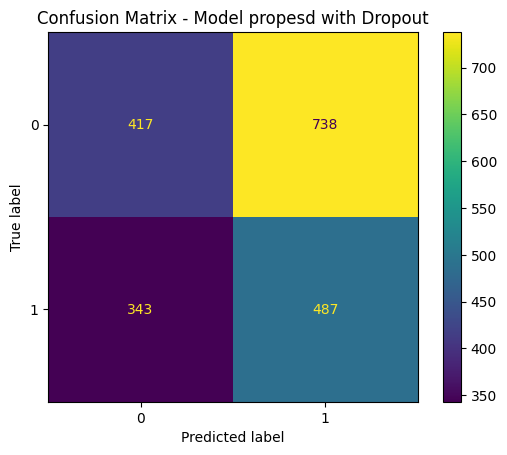

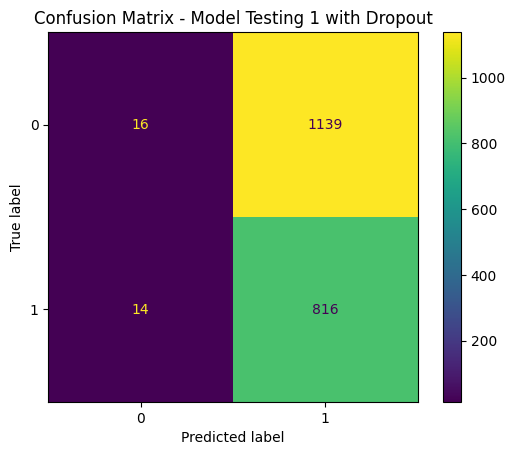

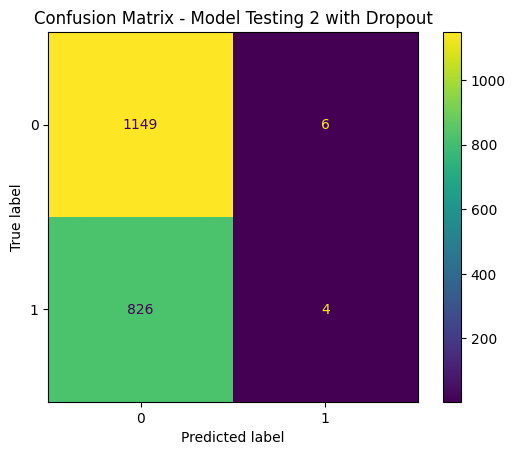

In [ ]:
# Import the necessary function
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(title)
    plt.show()

# Plot confusion matrix for model_possessed_dropout
plot_confusion_matrix(y_test, y_pred_classes_possessed_dropout, title='Confusion Matrix - Model propesd with Dropout')

# Plot confusion matrix for model_testing1_dropout
plot_confusion_matrix(y_test, y_pred_classes_testing1_dropout, title='Confusion Matrix - Model Testing 1 with Dropout')

# Plot confusion matrix for model_testing2_dropout
plot_confusion_matrix(y_test, y_pred_classes_testing2_dropout, title='Confusion Matrix - Model Testing 2 with Dropout')

Model 1: model_possessed with Glorot Initialization

In [ ]:
from tensorflow.keras.initializers import GlorotUniform

# Define the model architecture with Glorot initialization
model_possessed_glorot = Sequential([
    # First convolutional layer with Glorot initialization
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=GlorotUniform(), input_shape=(64, 64, 3)),

    # Second convolutional layer with Glorot initialization
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=GlorotUniform()),

    # First max-pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer with Glorot initialization
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer=GlorotUniform()),

    # Fourth convolutional layer with Glorot initialization
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_initializer=GlorotUniform()),

    # Second max-pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the convolutional layers
    Flatten(),

    # Fully connected layers with Glorot initialization
    Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(64, activation='relu', kernel_initializer=GlorotUniform()),

    # Output layer for binary classification (AD or MCI)
    Dense(2, activation='softmax')  # Softmax activation for multi-class classification
])



Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                               

In [ ]:
# Compile the model
model_possessed_glorot.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# Print model summary
model_possessed_glorot.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_39 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 13, 13, 64)        0         
 ng2D)                                               

In [ ]:
history6=model_proposed_dropout.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/30
199/199 [==============================] - 3s 16ms/step - loss: 0.1270 - accuracy: 0.9395 - val_loss: 0.2365 - val_accuracy: 0.8980
Epoch 2/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1333 - accuracy: 0.9381 - val_loss: 0.2345 - val_accuracy: 0.8992
Epoch 3/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1149 - accuracy: 0.9417 - val_loss: 0.2649 - val_accuracy: 0.9024
Epoch 4/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1095 - accuracy: 0.9463 - val_loss: 0.2323 - val_accuracy: 0.8929
Epoch 5/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1219 - accuracy: 0.9350 - val_loss: 0.2357 - val_accuracy: 0.8974
Epoch 6/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1193 - accuracy: 0.9414 - val_loss: 0.2293 - val_accuracy: 0.8942
Epoch 7/30
199/199 [==============================] - 3s 15ms/step - loss: 0.1150 - accuracy: 0.9411 - val_loss: 0.2437 - val_accuracy: 0.8992

test1

In [ ]:
# Define the model architecture with Glorot initialization
model_testing1_glorot = Sequential([
    # First convolutional layer with Glorot initialization
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=GlorotUniform(), input_shape=(64, 64, 3)),

    # Second convolutional layer with Glorot initialization
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=GlorotUniform()),

    # First max-pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the convolutional layers
    Flatten(),

    # Fully connected layers with Glorot initialization
    Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(2, activation='softmax')  # Softmax activation for multi-class classification
])



In [ ]:
# Compile the model
model_testing1_glorot.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Print model summary
model_testing1_glorot.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_47 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_18 (Flatten)        (None, 28800)             0         
                                                                 
 dense_48 (Dense)            (None, 128)               3686528   
                                                                 
 dense_49 (Dense)            (None, 2)                 258       
                                                     

In [ ]:
history7=model_proposed_dropout.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/30
199/199 [==============================] - 3s 16ms/step - loss: 0.0902 - accuracy: 0.9564 - val_loss: 0.2471 - val_accuracy: 0.9188
Epoch 2/30
199/199 [==============================] - 3s 14ms/step - loss: 0.0828 - accuracy: 0.9597 - val_loss: 0.3106 - val_accuracy: 0.9106
Epoch 3/30
199/199 [==============================] - 3s 15ms/step - loss: 0.0912 - accuracy: 0.9576 - val_loss: 0.3109 - val_accuracy: 0.9049
Epoch 4/30
199/199 [==============================] - 3s 16ms/step - loss: 0.0844 - accuracy: 0.9630 - val_loss: 0.3292 - val_accuracy: 0.9125
Epoch 5/30
199/199 [==============================] - 3s 15ms/step - loss: 0.0753 - accuracy: 0.9630 - val_loss: 0.2822 - val_accuracy: 0.9024
Epoch 6/30
199/199 [==============================] - 3s 15ms/step - loss: 0.0907 - accuracy: 0.9580 - val_loss: 0.2667 - val_accuracy: 0.9062
Epoch 7/30
199/199 [==============================] - 3s 15ms/step - loss: 0.0954 - accuracy: 0.9597 - val_loss: 0.2620 - val_accuracy: 0.9049

test2

In [ ]:
# Define the model architecture with Glorot initialization
model_testing2_glorot = Sequential([
    # First convolutional layer with Glorot initialization
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=GlorotUniform(), input_shape=(64, 64, 3)),

    # Second convolutional layer with Glorot initialization
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', kernel_initializer=GlorotUniform()),

    # Max-pooling layer
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten the output of the convolutional layers
    Flatten(),

    # Fully connected layers with Glorot initialization
    Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(64, activation='relu', kernel_initializer=GlorotUniform()),

    # Output layer for binary classification (AD or MCI)
    Dense(2, activation='softmax')  # Softmax activation for multi-class classification
])



In [ ]:
# Compile the model
model_testing2_glorot.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Print model summary
model_testing2_glorot.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_49 (Conv2D)          (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_19 (Flatten)        (None, 28800)             0         
                                                                 
 dense_50 (Dense)            (None, 128)               3686528   
                                                                 
 dense_51 (Dense)            (None, 64)                8256      
                                                     

In [ ]:
history7=model_proposed_dropout.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/30
199/199 [==============================] - 3s 16ms/step - loss: 0.0780 - accuracy: 0.9639 - val_loss: 0.3533 - val_accuracy: 0.9062
Epoch 2/30
199/199 [==============================] - 3s 16ms/step - loss: 0.0764 - accuracy: 0.9660 - val_loss: 0.3163 - val_accuracy: 0.9043
Epoch 3/30
199/199 [==============================] - 3s 14ms/step - loss: 0.0798 - accuracy: 0.9641 - val_loss: 0.2315 - val_accuracy: 0.9030
Epoch 4/30
199/199 [==============================] - 3s 14ms/step - loss: 0.0862 - accuracy: 0.9611 - val_loss: 0.2825 - val_accuracy: 0.9055
Epoch 5/30
199/199 [==============================] - 3s 15ms/step - loss: 0.0875 - accuracy: 0.9632 - val_loss: 0.2648 - val_accuracy: 0.9125
Epoch 6/30
199/199 [==============================] - 3s 16ms/step - loss: 0.0757 - accuracy: 0.9663 - val_loss: 0.2539 - val_accuracy: 0.9093
Epoch 7/30
199/199 [==============================] - 3s 14ms/step - loss: 0.0773 - accuracy: 0.9650 - val_loss: 0.2102 - val_accuracy: 0.9131

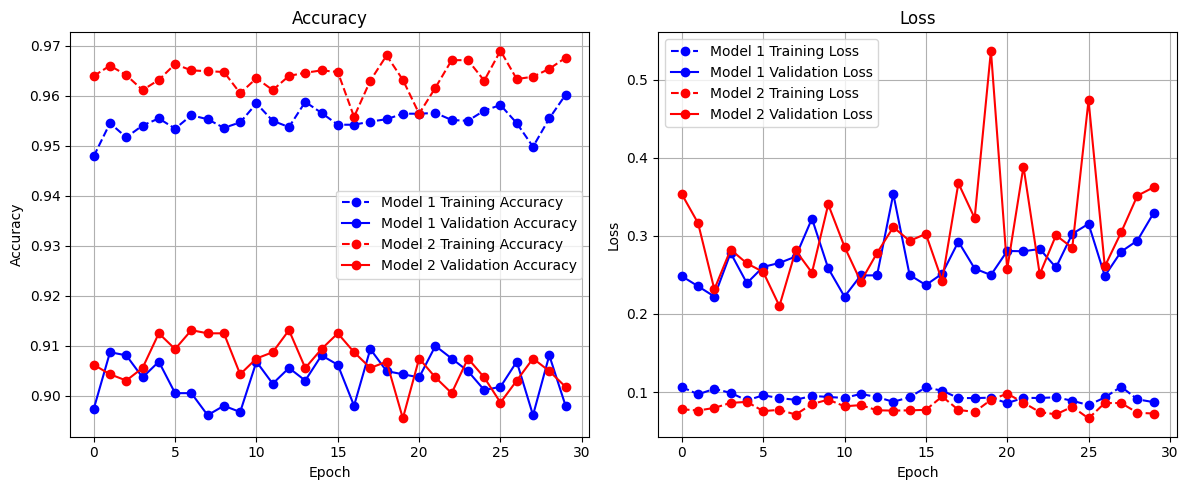

In [ ]:
import matplotlib.pyplot as plt

# Plotting accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'], label='Model 1 Training Accuracy', linestyle='--', marker='o', color='b')
plt.plot(history6.history['val_accuracy'], label='Model 1 Validation Accuracy', linestyle='-', marker='o', color='b')
plt.plot(history7.history['accuracy'], label='Model 2 Training Accuracy', linestyle='--', marker='o', color='r')
plt.plot(history7.history['val_accuracy'], label='Model 2 Validation Accuracy', linestyle='-', marker='o', color='r')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'], label='Model 1 Training Loss', linestyle='--', marker='o', color='b')
plt.plot(history6.history['val_loss'], label='Model 1 Validation Loss', linestyle='-', marker='o', color='b')
plt.plot(history7.history['loss'], label='Model 2 Training Loss', linestyle='--', marker='o', color='r')
plt.plot(history7.history['val_loss'], label='Model 2 Validation Loss', linestyle='-', marker='o', color='r')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
